### Обнаружение мошенничества с кредитными картами
Анонимные транзакции по кредитным картам, помеченные как мошеннические или подлинные

### Импортируем библиотеки

Для решения задачи анализа данных воспользуемся библиотеками numpy, pandas и scikit-learn. Библиотека numpy содержит реализации многомерных массивов и алгоритмов линейной алгебры. Библиотека pandas предоставляет широкий спектр функций по обработке табличных данных. Библиотека scikit-learn реализует множество алгоритмов машинного обучения. Кроме того, нам понадобится библиотека matplotlib для научной визуализации.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Работа с датасетом

In [128]:
#загружаем данные
card = pd.read_csv("creditcard.csv")

In [3]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Описание данных
Time: Время, прошедшее с момента первой транзакции.

V1-V28: Это набор анонимизированных признаков

Amount: Сумма транзакции.

Class: Целевая переменная, указывающая мошенническая ли операция или нет

### Смотрим и корректируем данные датасета

In [45]:
card.shape

(283726, 31)

In [15]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
card.duplicated().sum() 

1081

In [29]:
card = card.drop_duplicates().reset_index(drop=True)
card.duplicated().sum()

0

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

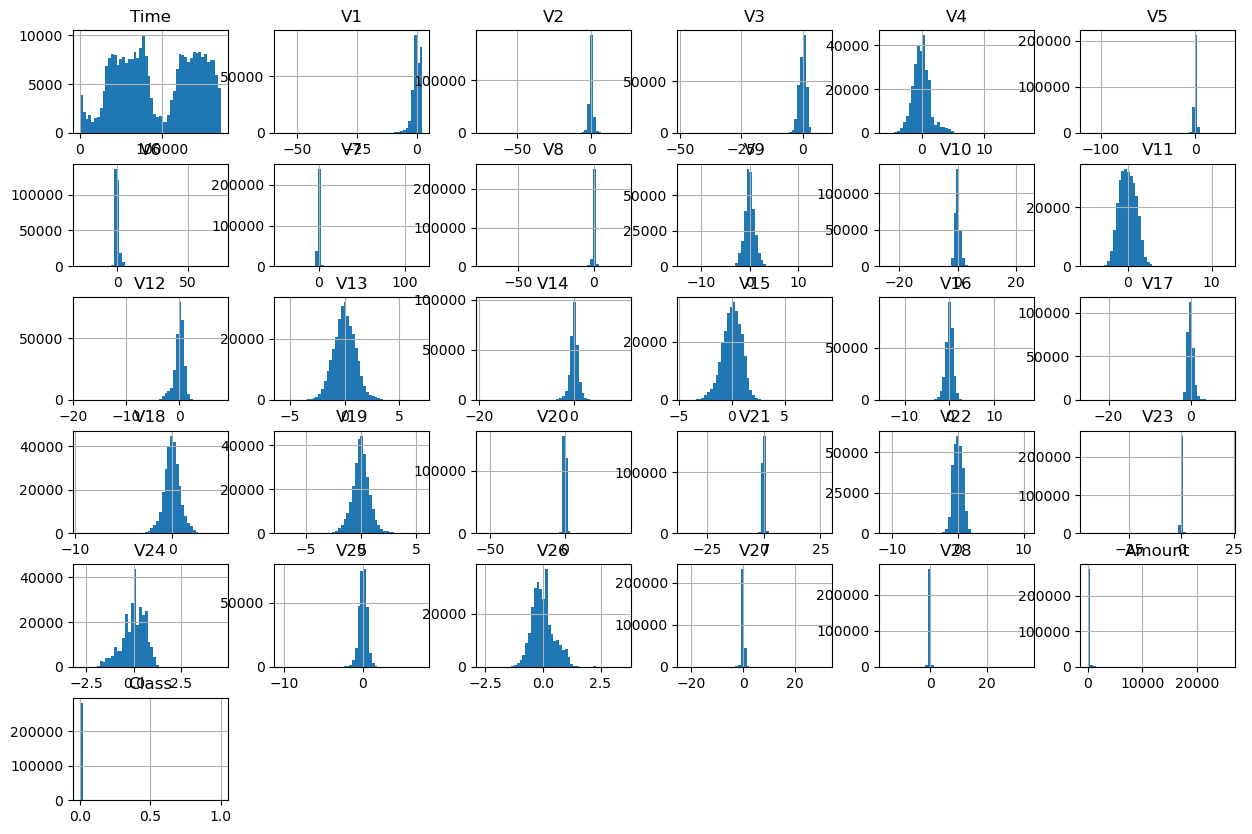

In [31]:
card.hist(figsize = (15,10), bins = 50)

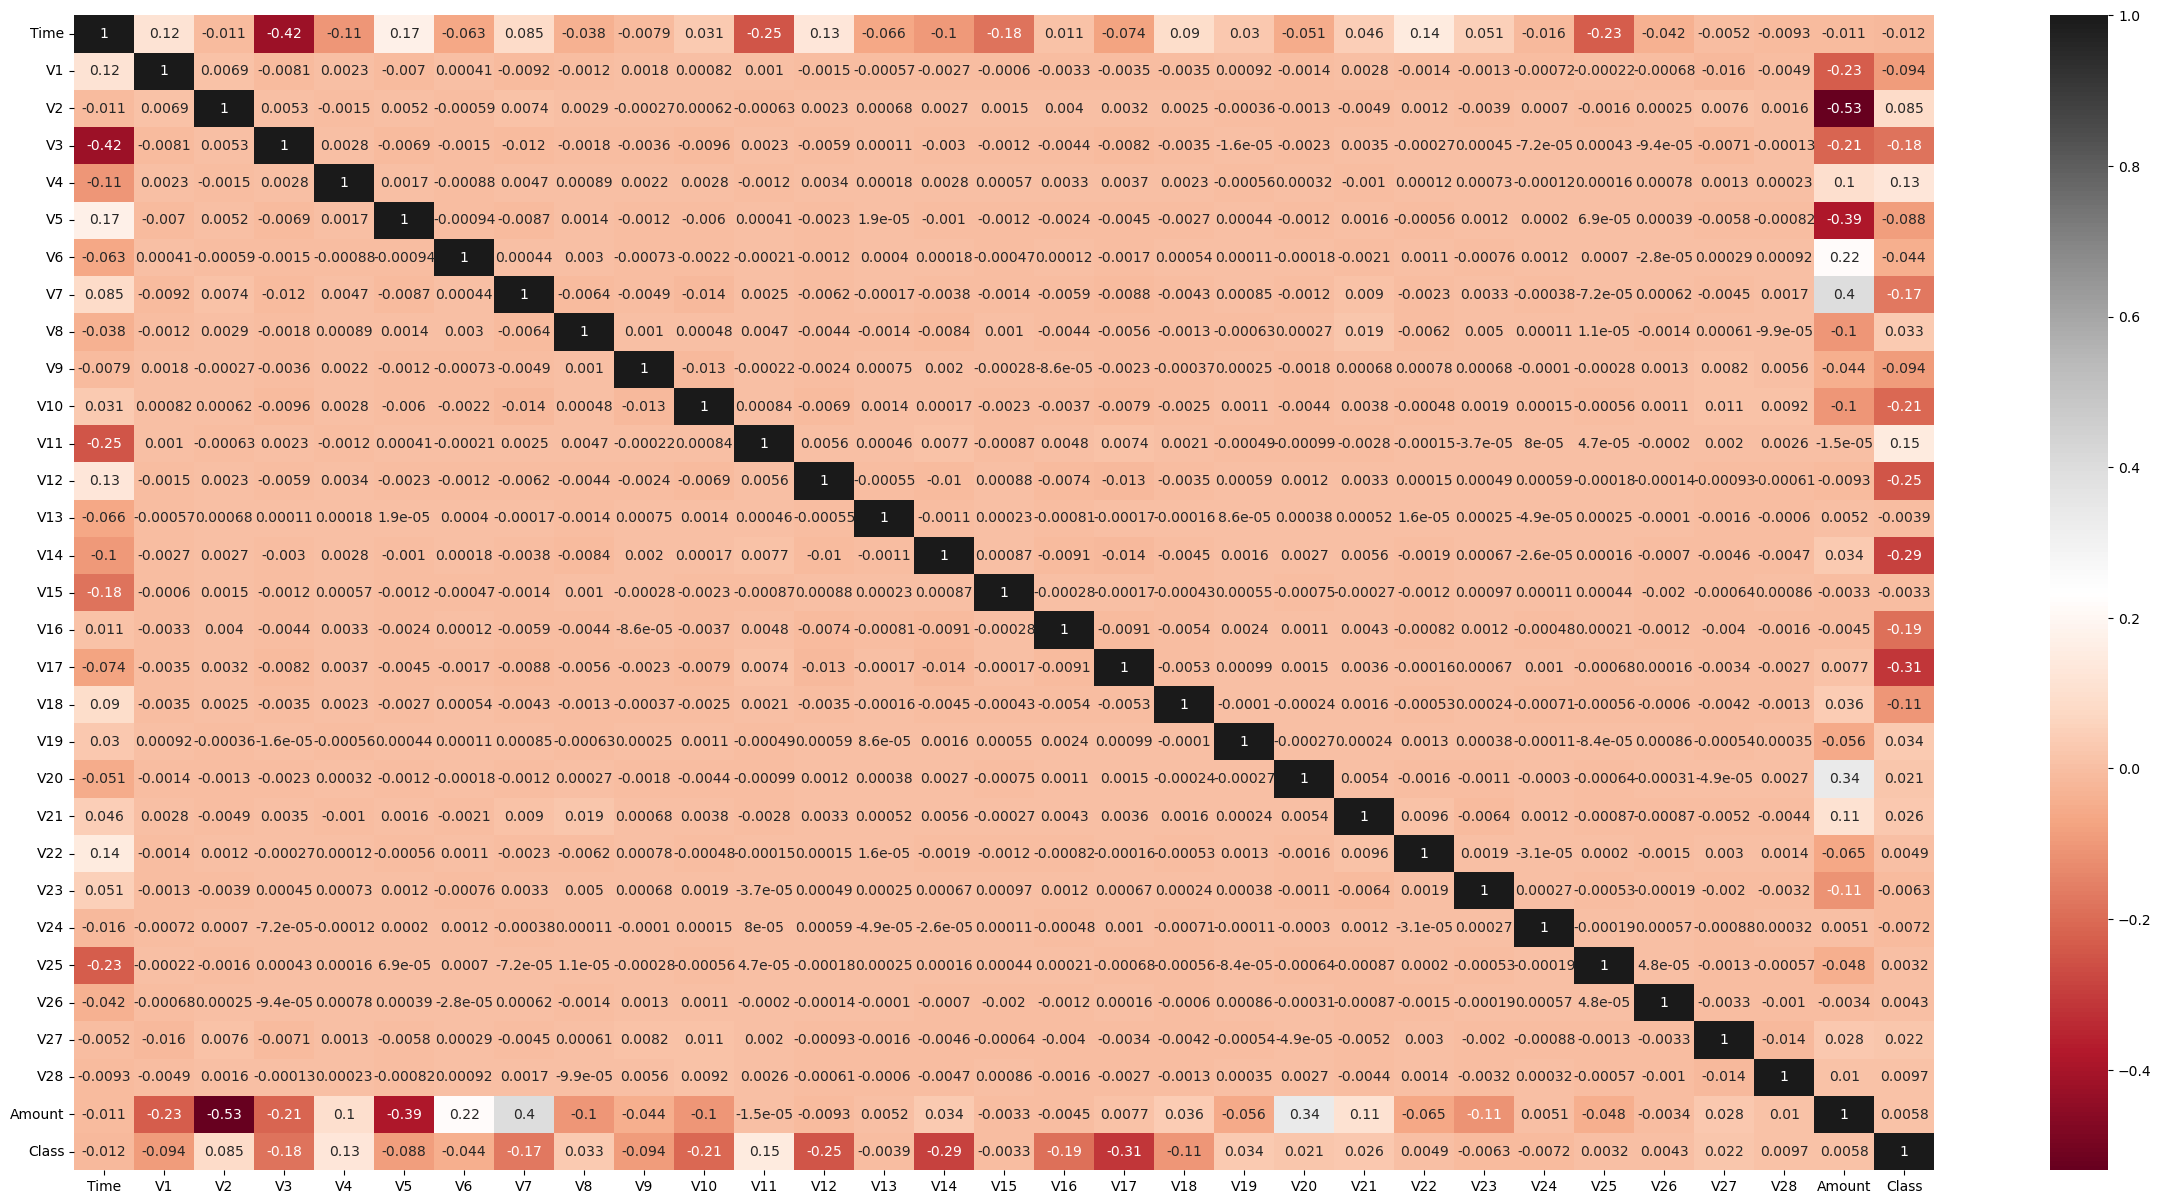

In [51]:
plt.figure(figsize = (30,15))
sns.heatmap(card.corr(),cmap = 'RdGy',annot = True,cbar=True);

Class
0    284315
1       492
Name: count, dtype: int64


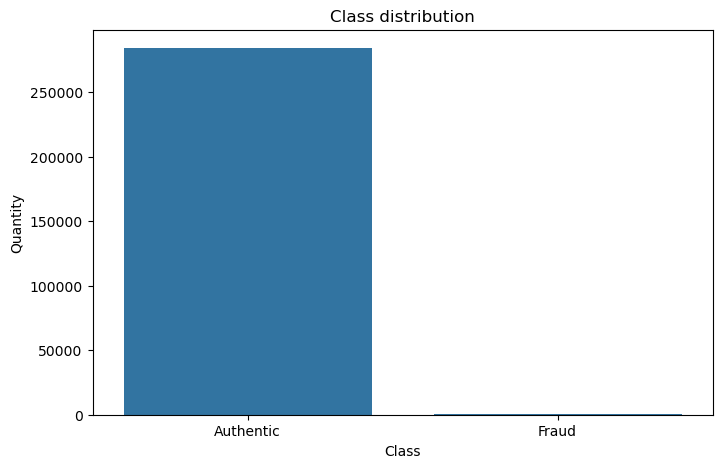

In [130]:
class_counts = card['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Сlass distribution')
plt.xlabel('Сlass')
plt.ylabel('Quantity')
plt.xticks(ticks=[0, 1], labels=['Authentic', 'Fraud'])
plt.show()

In [168]:
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
card[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 
      'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 
      'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
      'V26', 'V27', 'V28', 'Time', 'Amount']] = scaler.fit_transform(card[['V1', 'V2', 'V3', 'V4', 'V5', 
      'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 
      'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 
      'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount']])

In [169]:
from sklearn.model_selection import train_test_split

X = card.drop('Class', axis=1)  # Все столбцы, кроме целевого
y = card['Class']  # Целевой столбец

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
# Предсказание вероятностей
y_scores = model.predict_proba(X_test)[:, 1]

# Оценка модели
precision, recall, _ = precision_recall_curve(y_test, y_scores)
auprc = auc(recall, precision)

print(auprc)

0.8788359164392819


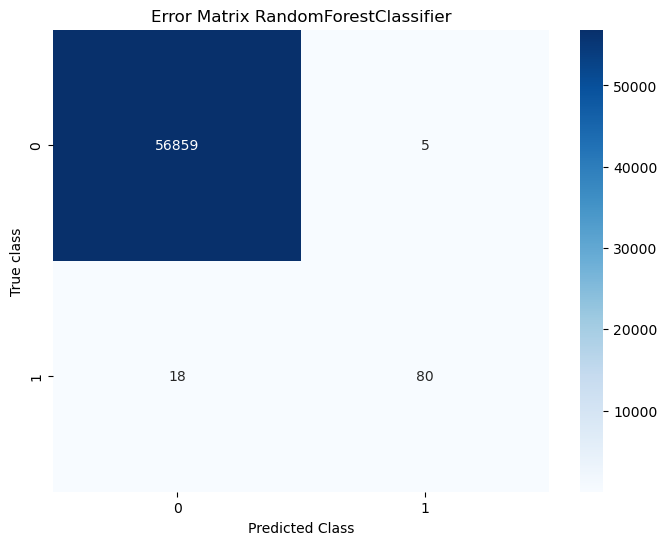

In [50]:
# Преобразование вероятностей в предсказанные классы
y_pred = (y_scores >= 0.5).astype(int)  # Используем порог 0.5

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('True class')
plt.title('Error Matrix RandomForestClassifier')
plt.show()

In [52]:
from sklearn.naive_bayes import GaussianNB

In [178]:
model = GaussianNB()

# Обучение модели
model.fit(X_train, y_train)

GaussianNB()

In [180]:
y_pred = model.predict(X_test)

In [182]:
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
auprc2 = auc(recall, precision)

print(auprc2)

0.42909292217011974


In [142]:
conf_matrix = confusion_matrix(y_test, y_pred)

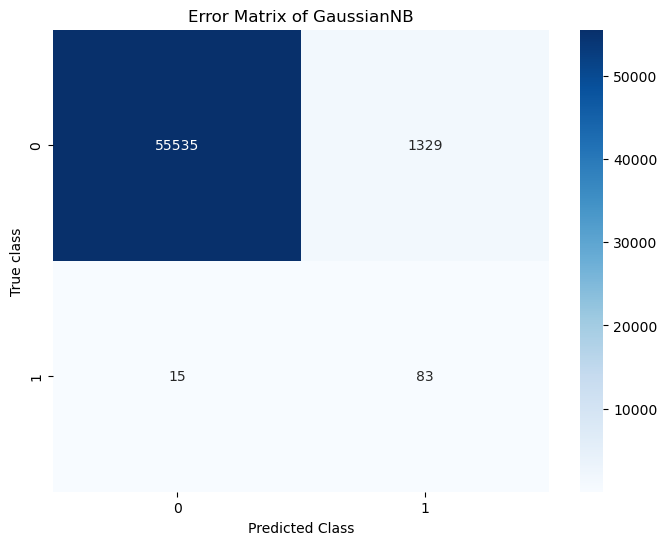

In [69]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('True class')
plt.title('Error Matrix of GaussianNB')
plt.show()

In [144]:
from sklearn.linear_model import LogisticRegression

In [184]:
model = LogisticRegression(random_state = 42)

model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [186]:
y_pred = model.predict(X_test)

y_scores = model.predict_proba(X_test)[:, 1] 
precision, recall, _ = precision_recall_curve(y_test, y_scores)
auprc3 = auc(recall, precision)

print(auprc3)

0.7412468734809871


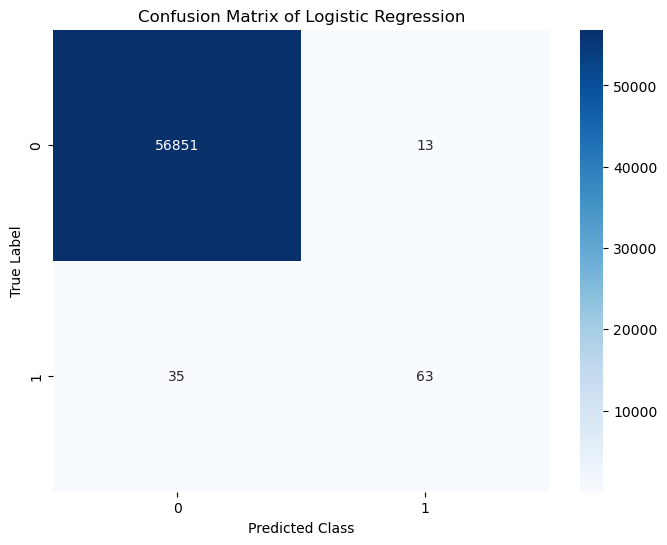

In [150]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [109]:
classifiers =["Random Forest Classifier","Gaussian Naive Bayes", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [auprc, auprc2, auprc3]

In [111]:
log

,Classifier,Accuracy
0,Random Forest Classifier,0.878836
1,Gaussian Naive Bayes,0.429093
2,Logistic Regression,0.744225


### Вывод

На основе проведенного анализа и обучения трех различных моделей на датасете о мошенничестве с кредитными картами, мы получили следующие результаты:

Random Forest Classifier:

Эта модель показала наилучшие результаты среди всех протестированных. Высокая точность указывает на то, что она справляется с задачей классификации, хорошо обрабатывая как линейные, так и нелинейные зависимости в данных.

Logistic Regression:

Логистическая регрессия продемонстрировала средние результаты.

Gaussian Naive Bayes:

Наивный байесовский классификатор показал наименьшую точность.